In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [120]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(600, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

In [121]:
pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)
S = X_pca.std(axis=0)


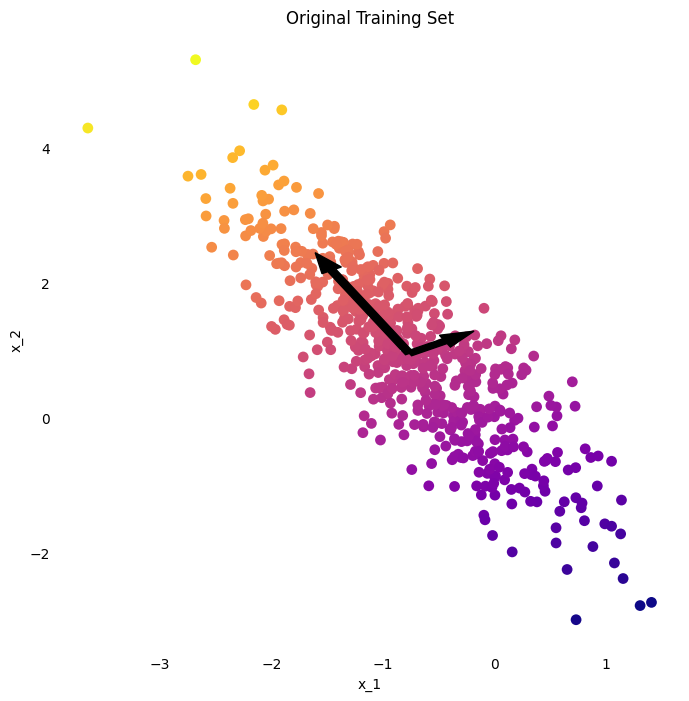

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='plasma')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_title('Original Training Set')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.08, head_width=.2,
                  color='k')
ax.arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                S[1] * pca.components_[1, 1], width=.08, head_width=.2,
                color='k')
plt.savefig('original-training-set.png')

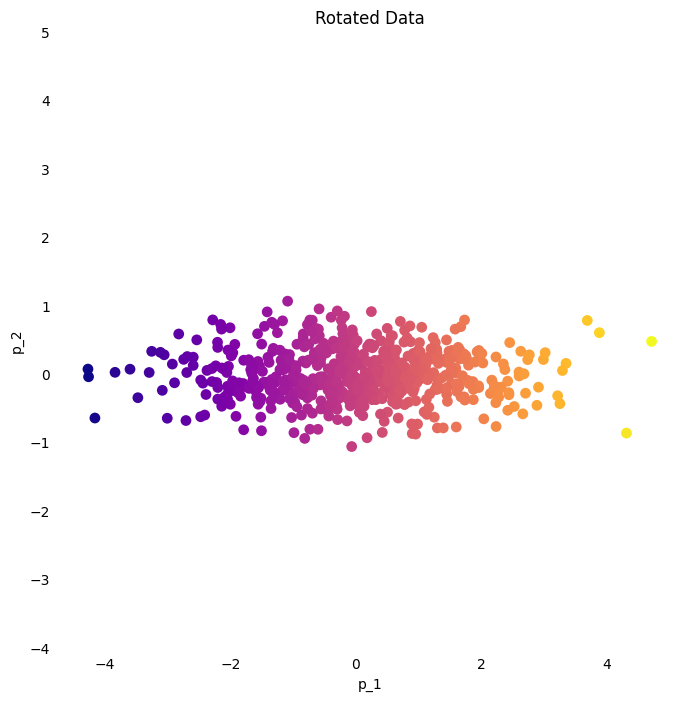

In [64]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='plasma')
ax.set_ylim(-4, 5)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_title('Rotated Data')
ax.set_xlabel('p_1')
ax.set_ylabel('p_2')
plt.savefig('rotated-training-set.png')

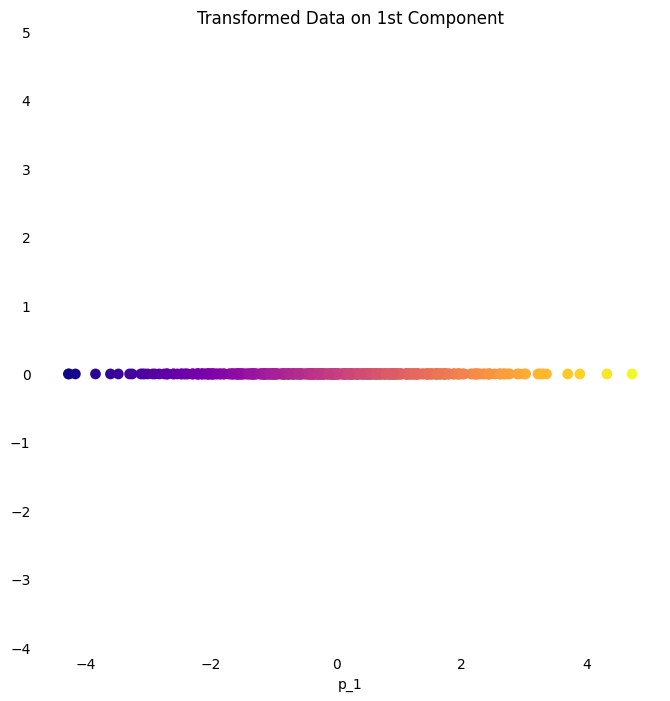

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_pca[:, 0], np.zeros(X_pca[:, 1].shape), c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='plasma')
ax.set_ylim(-4, 5)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_title('Transformed Data on 1st Component')
ax.set_xlabel('p_1')
plt.savefig('1st-component-training-set.png')

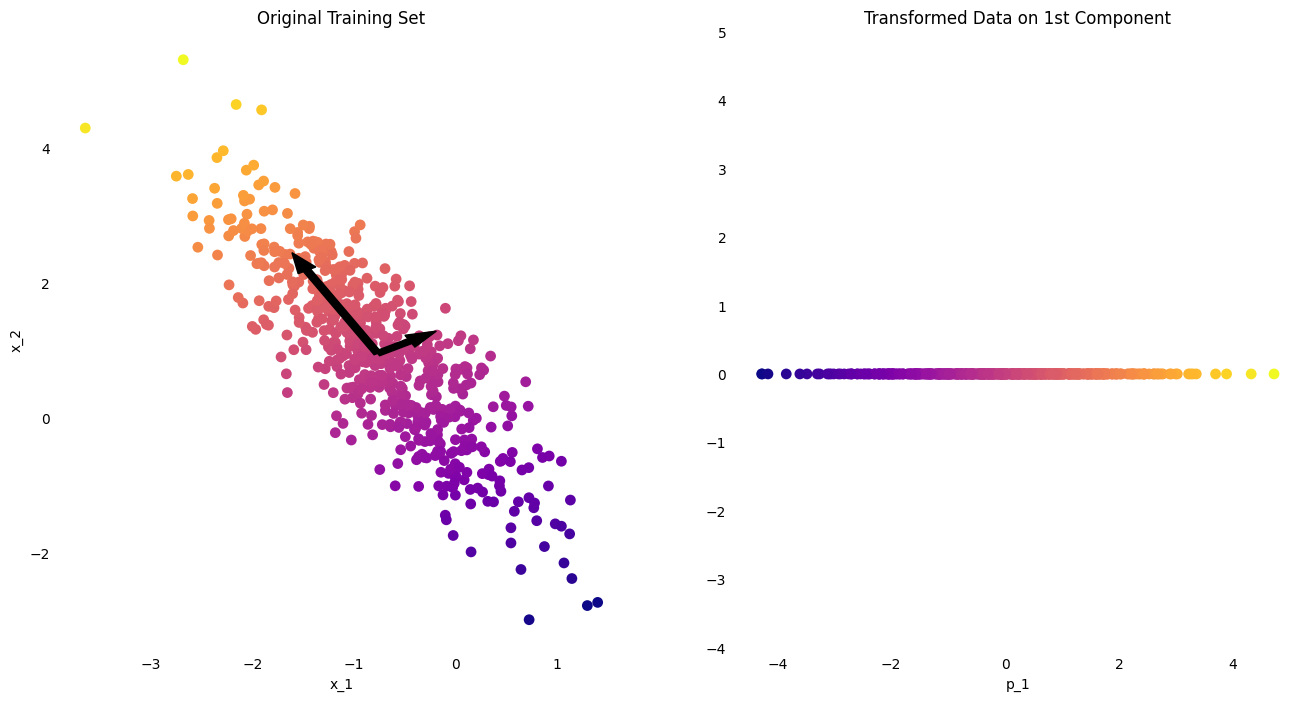

In [122]:
fig, axes = plt.subplots(1,2,figsize=(16, 8))
axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='plasma')
axes[0].spines['top'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].xaxis.set_ticks_position('none') 
axes[0].yaxis.set_ticks_position('none')
axes[0].set_title('Original Training Set')
axes[0].set_xlabel('x_1')
axes[0].set_ylabel('x_2')
axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.08, head_width=.2,
                  color='k')
axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                S[1] * pca.components_[1, 1], width=.08, head_width=.2,
                color='k')

axes[1].scatter(X_pca[:, 0], np.zeros(X_pca[:, 1].shape), c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='plasma')
axes[1].set_ylim(-4, 5)
axes[1].spines['top'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].xaxis.set_ticks_position('none') 
axes[1].yaxis.set_ticks_position('none')
axes[1].set_title('Transformed Data on 1st Component')
axes[1].set_xlabel('p_1')

plt.savefig('pca-1.png')

In [95]:
np.random.seed(42)
m = 1000
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5

X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [96]:
X.shape

(1000, 3)

In [97]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [98]:
X_pca = pca.transform(X)

In [99]:
axes = [-2, 2, -2, 2, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)
C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

In [100]:
X_pca[:,0].shape

(1000,)

In [101]:
X.shape

(1000, 3)

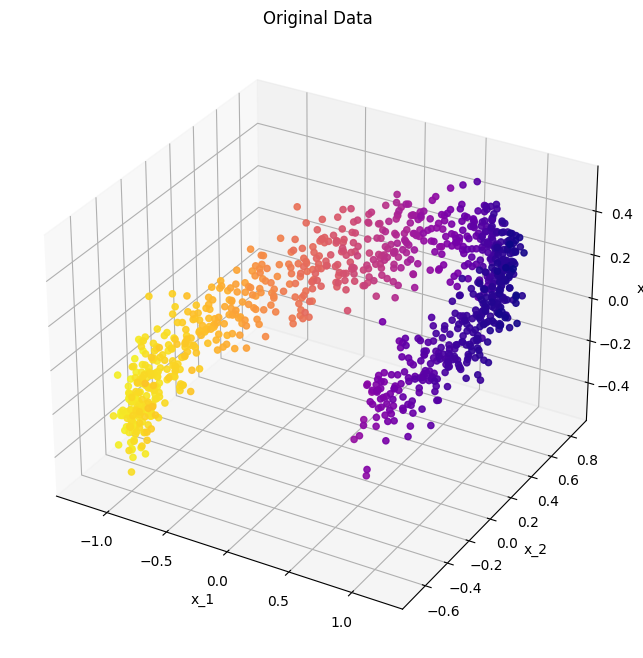

In [107]:
fig = plt.figure(figsize=(8   , 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], "bo", alpha=0.9, c=X_pca[:,0], cmap='plasma')
ax.set_title('Original Data')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')
plt.savefig('3d-original.png')

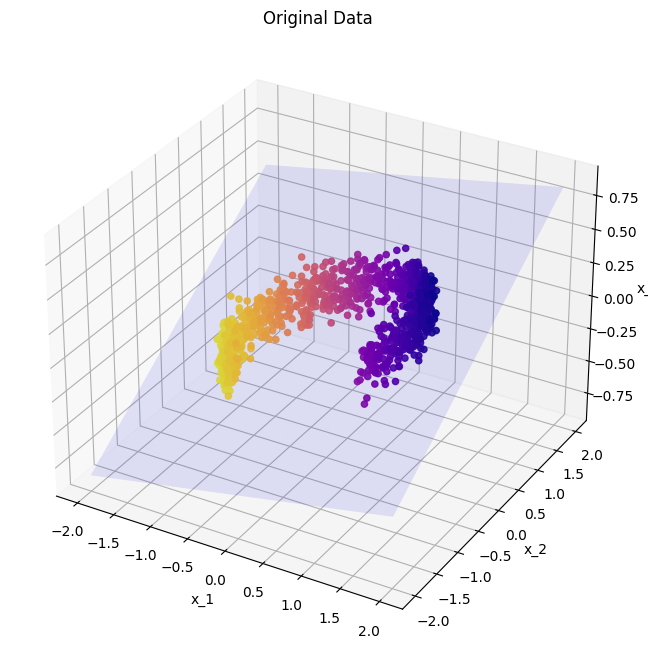

In [109]:
fig = plt.figure(figsize=(8   , 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], "bo", alpha=0.9, c=X_pca[:,0], cmap='plasma')
ax.set_title('Original Data')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')
ax.plot_surface(x1, x2, z, alpha=0.1, color="b")
plt.savefig('3d-plane.png')

In [14]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1500, noise=0.3, random_state=2)

In [15]:
X.shape

(1500, 3)

In [16]:
t.shape

(1500,)

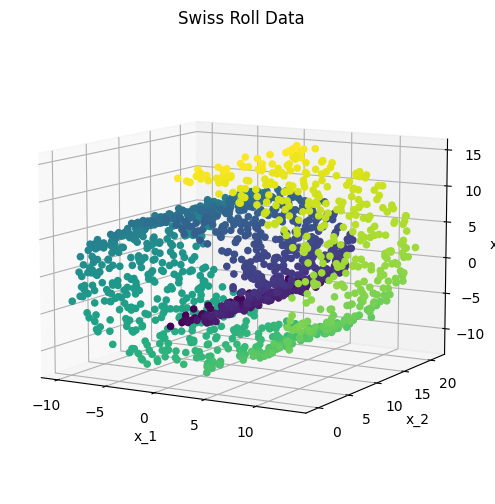

In [17]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap='viridis',alpha=1)
ax.set_title('Swiss Roll Data')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')
ax.view_init(10, -60)
plt.savefig('swiss-roll_2.png')

In [28]:
np.random.seed(42)
m = 1000
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5

X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [29]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [30]:
from sklearn.datasets import make_swiss_roll
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.3, random_state=42)

from sklearn.decomposition import KernelPCA
pca_swiss = KernelPCA(n_components=2, kernel='sigmoid', gamma=1e-3, coef0=1, fit_inverse_transform=True)
X_pca_swiss = pca_swiss.fit_transform(X_swiss)

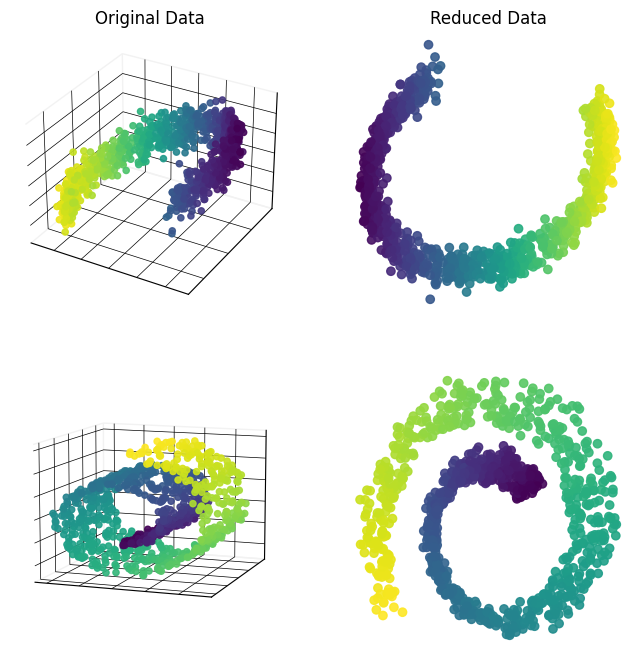

In [31]:
fig = plt.figure(figsize=(8   , 8))

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], "o", alpha=0.9, c=X_pca[:,0], cmap='viridis')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticklabels([])
    axis._axinfo['axisline']['linewidth'] = 1
    axis._axinfo['axisline']['color'] = (0, 0, 0)
    axis._axinfo['grid']['linewidth'] = 0.5
    axis._axinfo['grid']['linestyle'] = "-"
    axis._axinfo['grid']['color'] = (0, 0, 0)
    axis._axinfo['tick']['inward_factor'] = 0.0
    axis._axinfo['tick']['outward_factor'] = 0.0
    axis.set_pane_color((0.95, 0.95, 0.95))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.set_title('Original Data')

ax = fig.add_subplot(222)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.9, c=X_pca[:,0], cmap='viridis')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Reduced Data')

ax = fig.add_subplot(223, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], "o", alpha=0.9, c=t, cmap='viridis')
ax.view_init(10, -70)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticklabels([])
    axis._axinfo['axisline']['linewidth'] = 1
    axis._axinfo['axisline']['color'] = (0, 0, 0)
    axis._axinfo['grid']['linewidth'] = 0.5
    axis._axinfo['grid']['linestyle'] = "-"
    axis._axinfo['grid']['color'] = (0, 0, 0)
    axis._axinfo['tick']['inward_factor'] = 0.0
    axis._axinfo['tick']['outward_factor'] = 0.0
    axis.set_pane_color((0.95, 0.95, 0.95))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax = fig.add_subplot(224)
ax.scatter(X_pca_swiss[:, 0], X_pca_swiss[:, 1], alpha=0.9, c=t, cmap='viridis')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])


plt.savefig('intro_2.png')

In [123]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll

# Create synthetic data
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Instantiate a PCA object
pca = PCA(n_components=1)

# Fit the PCA object on the data
pca.fit(X)

# Transform the data
X_transformed = pca.transform(X)

print('Original data shape: ', X.shape)
print('Transformed data shape: ', X_transformed.shape)

Original data shape:  (1000, 3)
Transformed data shape:  (1000, 1)


In [124]:
pca.explained_variance_ratio_

array([0.40782396])

In [128]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA


In [129]:
# Load the dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)


In [132]:
X = mnist.data
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
pca = PCA()
pca.fit(X)
eva = pca.explained_variance_ratio_

cum_sum = np.cumsum(eva)

In [150]:
pc_95 = np.argmax(cum_sum>=.95)
pc_95

153

In [138]:
np.round(eva, decimals=4)

array([0.0975, 0.0716, 0.0615, 0.054 , 0.0489, 0.0431, 0.0328, 0.0289,
       0.0276, 0.0234, 0.0211, 0.0204, 0.0171, 0.0169, 0.0158, 0.0149,
       0.0132, 0.0128, 0.0119, 0.0115, 0.0107, 0.0101, 0.0096, 0.0091,
       0.0088, 0.0084, 0.0081, 0.0079, 0.0074, 0.0069, 0.0066, 0.0065,
       0.006 , 0.0059, 0.0057, 0.0054, 0.005 , 0.0049, 0.0048, 0.0047,
       0.0045, 0.0044, 0.0042, 0.004 , 0.0038, 0.0038, 0.0036, 0.0035,
       0.0034, 0.0032, 0.0032, 0.0031, 0.003 , 0.0029, 0.0028, 0.0027,
       0.0027, 0.0026, 0.0025, 0.0024, 0.0024, 0.0024, 0.0023, 0.0022,
       0.0021, 0.0021, 0.002 , 0.002 , 0.0019, 0.0019, 0.0019, 0.0018,
       0.0018, 0.0017, 0.0016, 0.0016, 0.0016, 0.0015, 0.0015, 0.0014,
       0.0014, 0.0014, 0.0014, 0.0014, 0.0013, 0.0013, 0.0013, 0.0013,
       0.0012, 0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.0009, 0.0009, 0.0009,
       0.0009, 0.0009, 0.0009, 0.0009, 0.0008, 0.0008, 0.0008, 0.0008,
      

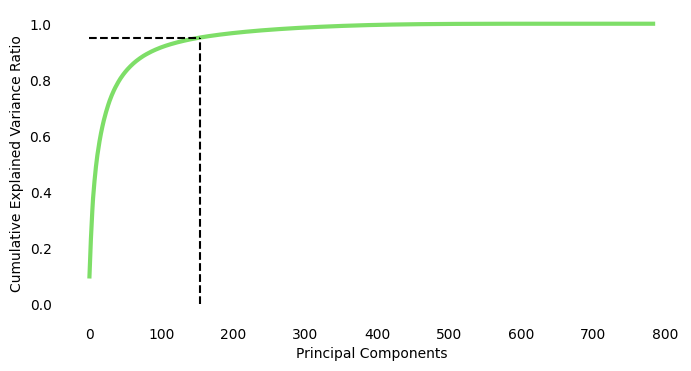

In [156]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(cum_sum, linewidth=3, color=sns.color_palette("hls",24)[7], alpha=.9)
plt.plot([0, pc_95], [0.95, 0.95], 'k--')
plt.plot([pc_95, pc_95], [0, 0.95], 'k--')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_xlabel('Principal Components')

plt.savefig('eva-cum.png')

In [157]:
pca = PCA(n_components=.95)
pca.fit(X)
X_transformed = pca.transform(X)

print(X_transformed.shape)

(70000, 154)


In [158]:
print((70000,153))

(70000, 153)


In [36]:
from sklearn.datasets import make_swiss_roll
X_swiss, t = make_swiss_roll(n_samples=1500, noise=0.3, random_state=2)

from sklearn.decomposition import KernelPCA
pca_swiss = KernelPCA(n_components=2, kernel='sigmoid', gamma=1e-3, coef0=1, fit_inverse_transform=True)
X_pca_swiss = pca_swiss.fit_transform(X_swiss)

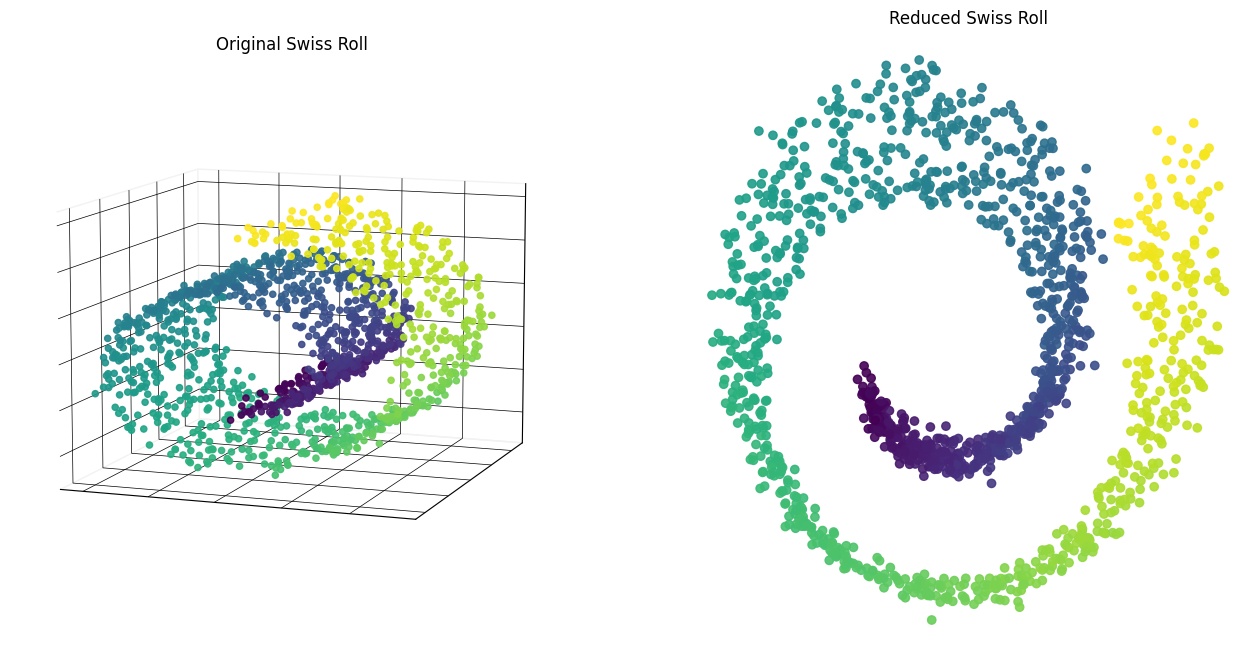

In [37]:
fig = plt.figure(figsize=(16   , 8))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], "o", alpha=0.9, c=t, cmap='viridis')
ax.view_init(10, -70)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticklabels([])
    axis._axinfo['axisline']['linewidth'] = 1
    axis._axinfo['axisline']['color'] = (0, 0, 0)
    axis._axinfo['grid']['linewidth'] = 0.5
    axis._axinfo['grid']['linestyle'] = "-"
    axis._axinfo['grid']['color'] = (0, 0, 0)
    axis._axinfo['tick']['inward_factor'] = 0.0
    axis._axinfo['tick']['outward_factor'] = 0.0
    axis.set_pane_color((0.95, 0.95, 0.95))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.set_title('Original Swiss Roll')

ax = fig.add_subplot(122)
ax.scatter(X_pca_swiss[:, 0], X_pca_swiss[:, 1], alpha=0.9, c=t, cmap='viridis')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Reduced Swiss Roll')

plt.savefig('kPCA_1.png')

In [44]:
from sklearn.datasets import make_swiss_roll
X_swiss, t = make_swiss_roll(n_samples=1500, noise=0.3, random_state=2)

from sklearn.decomposition import KernelPCA
kPCA_dict = {
    "linear": KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True),
    "sigmoid": KernelPCA(n_components=2, kernel='sigmoid', gamma=1e-3, coef0=1, fit_inverse_transform=True),
    "poly": KernelPCA(n_components=2, kernel='poly', degree=2, fit_inverse_transform=True),
    "cosine": KernelPCA(n_components=2, kernel='cosine', fit_inverse_transform=True),
}

X_pca_swiss = {}

for kernel_type in kPCA_dict.keys():
    X_pca_swiss[kernel_type] = kPCA_dict[kernel_type].fit_transform(X_swiss)



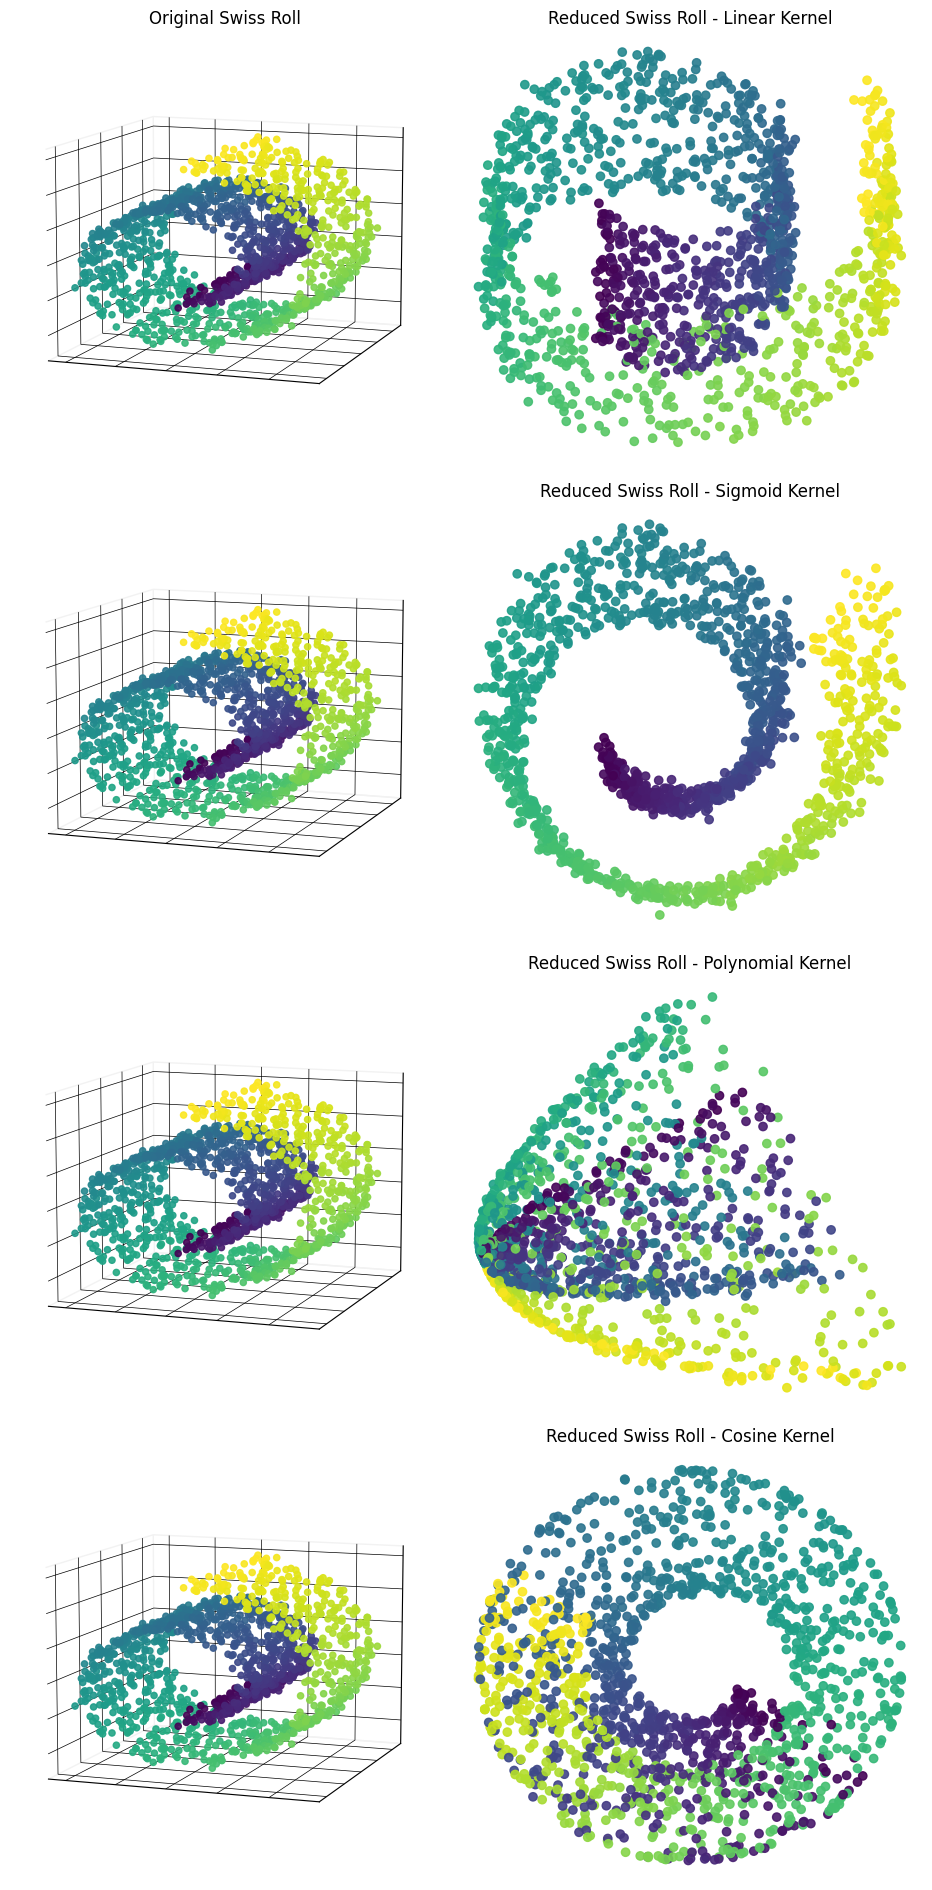

In [59]:
fig = plt.figure(figsize=(12   , 24))

ax = fig.add_subplot(421, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], "o", alpha=0.9, c=t, cmap='viridis')
ax.view_init(10, -70)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticklabels([])
    axis._axinfo['axisline']['linewidth'] = 1
    axis._axinfo['axisline']['color'] = (0, 0, 0)
    axis._axinfo['grid']['linewidth'] = 0.5
    axis._axinfo['grid']['linestyle'] = "-"
    axis._axinfo['grid']['color'] = (0, 0, 0)
    axis._axinfo['tick']['inward_factor'] = 0.0
    axis._axinfo['tick']['outward_factor'] = 0.0
    axis.set_pane_color((0.95, 0.95, 0.95))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.set_title('Original Swiss Roll')

ax = fig.add_subplot(422)
ax.scatter(X_pca_swiss['linear'][:, 0], X_pca_swiss['linear'][:, 1], alpha=0.9, c=t, cmap='viridis')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Reduced Swiss Roll - Linear Kernel')

ax = fig.add_subplot(423, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], "o", alpha=0.9, c=t, cmap='viridis')
ax.view_init(10, -70)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticklabels([])
    axis._axinfo['axisline']['linewidth'] = 1
    axis._axinfo['axisline']['color'] = (0, 0, 0)
    axis._axinfo['grid']['linewidth'] = 0.5
    axis._axinfo['grid']['linestyle'] = "-"
    axis._axinfo['grid']['color'] = (0, 0, 0)
    axis._axinfo['tick']['inward_factor'] = 0.0
    axis._axinfo['tick']['outward_factor'] = 0.0
    axis.set_pane_color((0.95, 0.95, 0.95))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax = fig.add_subplot(424)
ax.scatter(X_pca_swiss['sigmoid'][:, 0], X_pca_swiss['sigmoid'][:, 1], alpha=0.9, c=t, cmap='viridis')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Reduced Swiss Roll - Sigmoid Kernel')

ax = fig.add_subplot(425, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], "o", alpha=0.9, c=t, cmap='viridis')
ax.view_init(10, -70)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticklabels([])
    axis._axinfo['axisline']['linewidth'] = 1
    axis._axinfo['axisline']['color'] = (0, 0, 0)
    axis._axinfo['grid']['linewidth'] = 0.5
    axis._axinfo['grid']['linestyle'] = "-"
    axis._axinfo['grid']['color'] = (0, 0, 0)
    axis._axinfo['tick']['inward_factor'] = 0.0
    axis._axinfo['tick']['outward_factor'] = 0.0
    axis.set_pane_color((0.95, 0.95, 0.95))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax = fig.add_subplot(426)
ax.scatter(X_pca_swiss['poly'][:, 0], X_pca_swiss['poly'][:, 1], alpha=0.9, c=t, cmap='viridis')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Reduced Swiss Roll - Polynomial Kernel')

ax = fig.add_subplot(427, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], "o", alpha=0.9, c=t, cmap='viridis')
ax.view_init(10, -70)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticklabels([])
    axis._axinfo['axisline']['linewidth'] = 1
    axis._axinfo['axisline']['color'] = (0, 0, 0)
    axis._axinfo['grid']['linewidth'] = 0.5
    axis._axinfo['grid']['linestyle'] = "-"
    axis._axinfo['grid']['color'] = (0, 0, 0)
    axis._axinfo['tick']['inward_factor'] = 0.0
    axis._axinfo['tick']['outward_factor'] = 0.0
    axis.set_pane_color((0.95, 0.95, 0.95))
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax = fig.add_subplot(428)
ax.scatter(X_pca_swiss['cosine'][:, 0], X_pca_swiss['cosine'][:, 1], alpha=0.9, c=t, cmap='viridis')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Reduced Swiss Roll - Cosine Kernel')

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.savefig('kPCA_2.png')